## 병원데이터 주신걸로 Arima와 Prophet을 해보자.

In [1]:
import matplotlib.pyplot as plt      #시각화를 위한 설치
import matplotlib.font_manager as fm    # 한글 폰트
import matplotlib                   #시각화를 위한 설치
import os, warnings  
import pandas as pd                #구조 변경 및 결합을 하기 위한 설치        
import plotly.express as px        #시각화를 위한 설치

warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)         #모든 행을 다 보여주라는 명령
pd.set_option('display.max_columns', None)      #모든 열을 다 보여주라는 명령

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
## 한글 폰트 적용 ( 안하면 한글 깨짐 )
f_name = fm.FontProperties(fname="C:/Windows/Fonts/malgunbd.ttf").get_name()
plt.rc('font', family=f_name)

In [3]:
hospital= pd.read_csv('a.csv')

In [4]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  57 non-null     object
 1   CNT          57 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [5]:
train=hospital[(hospital['ACCOUNTDATE']>='2018-01-02')&(hospital['ACCOUNTDATE']<='2018-03-30')]
test=hospital[(hospital['ACCOUNTDATE']>='2018-04-02')&(hospital['ACCOUNTDATE']<='2018-04-30')]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ACCOUNTDATE  26 non-null     object
 1   CNT          26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [7]:
train['ACCOUNTDATE']=train['ACCOUNTDATE'].astype('str')
train['ACCOUNTDATE']=pd.to_datetime(train['ACCOUNTDATE'])
train.index=train['ACCOUNTDATE']
train.set_index('ACCOUNTDATE',inplace=True)

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2018-03-05 to 2018-03-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CNT     26 non-null     int64
dtypes: int64(1)
memory usage: 416.0 bytes


<AxesSubplot:xlabel='ACCOUNTDATE'>

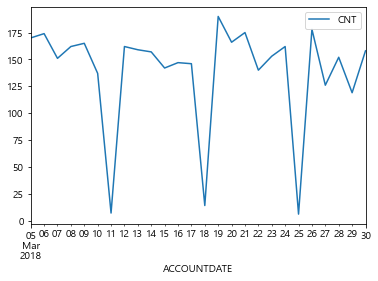

In [9]:
train.plot()

In [25]:
# AD-Fuller Test : 시계열의 정상성(stationary) 한지 확인

from statsmodels.tsa.stattools import adfuller

""" 차분 방법 """
train_diff =train - train.shift(1)
print(train)

y = train.dropna()
y1diff =train_diff.dropna()
result = adfuller(y)
print(f'원 데이터 ADF Statistic: {result[0]:.3f}')
print(f'원 데이터 p-value: {result[1]:.3f}')
result = adfuller(y1diff)
print(f'1차 차분 ADF Statistic: {result[0]:.3f}')
print(f'1차 차분 p-value: {result[1]:.3f}')

             CNT
ACCOUNTDATE     
2018-03-05   170
2018-03-06   174
2018-03-07   151
2018-03-08   162
2018-03-09   165
2018-03-10   137
2018-03-11     7
2018-03-12   162
2018-03-13   159
2018-03-14   157
2018-03-15   142
2018-03-16   147
2018-03-17   146
2018-03-18    14
2018-03-19   190
2018-03-20   166
2018-03-21   175
2018-03-22   140
2018-03-23   153
2018-03-24   162
2018-03-25     6
2018-03-26   178
2018-03-27   126
2018-03-28   152
2018-03-29   119
2018-03-30   158
원 데이터 ADF Statistic: -3.579
원 데이터 p-value: 0.006
1차 차분 ADF Statistic: -1.590
1차 차분 p-value: 0.489


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 14 must be < 12.

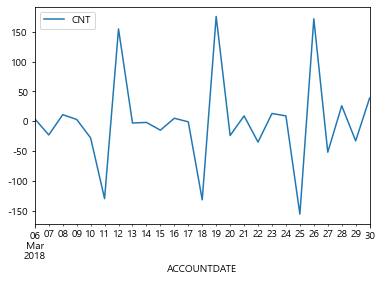

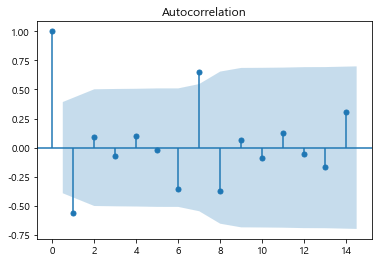

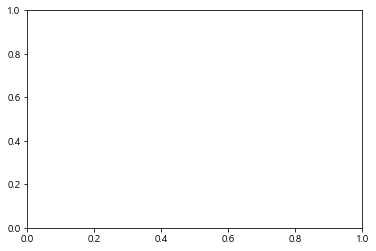

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
diff_1=train.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [27]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [28]:
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    try:
        model_arima=ARIMA(train.CNT.values, order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 280.6534392119996
(0, 0, 1) 280.91601797310966
(0, 0, 2) 277.69622140688614
(0, 0, 3) 279.1161102368318
(0, 0, 4) 273.008587455833
(0, 1, 0) 292.943621965823
(0, 1, 1) 275.9857352113954
(0, 1, 2) 276.7903076634351
(0, 1, 3) 276.46158972670753
(0, 1, 4) 277.62569631592396
(0, 2, 0) 309.6504276062277
(0, 2, 1) 287.53410077725954
(0, 2, 2) 274.51817985996234
(0, 2, 3) 276.41145786455616
(1, 0, 0) 281.46092839143193
(1, 1, 0) 285.62629232280216
(1, 1, 1) 277.0629150911146
(1, 2, 0) 295.4229627791558
(1, 2, 1) 281.3782513047845
(2, 0, 0) 283.1182513926211
(2, 1, 0) 284.9788138336778
(2, 2, 0) 291.54336294944346
(2, 2, 1) 294.839540239882
(3, 0, 0) 284.18010865200563
(3, 0, 2) 282.50665781405314
(3, 1, 0) 284.5977178789674
(3, 2, 0) 288.256153083384
(3, 2, 1) 294.8556993569117
(4, 0, 0) 285.67475271402657
(4, 1, 0) 286.1012437990135


In [79]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
def my_auto_arima(data,order,sort = 'AIC'):
    order_list = []
    order_list1 = []
    order_list2 = []
    aic_list = []
    bic_list = []
    test=[]
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = p
                    d_order = d
                    e_order = q
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    order_list1.append(d_order)
                    order_list2.append(e_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                    c = f'{p} ,{d} ,{q}, {aic}'
                    test.append(c)
                except:
                    pass
                result_df = pd.DataFrame(list(zip(order_list,order_list1, order_list2, aic_list,test)),columns=['order','order1','order2','AIC','test'])
                result_df.sort_values(sort, inplace=True)
    return result_df

In [80]:
a=my_auto_arima(train,[3,3,3])

In [81]:
a

,order,order1,order2,AIC,test
8,0,2,2,274.518180,"0 ,2 ,2, 274.51817985996234"
4,0,1,1,275.985735,"0 ,1 ,1, 275.9857352113954"
5,0,1,2,276.790308,"0 ,1 ,2, 276.7903076634351"
11,1,1,1,277.062915,"1 ,1 ,1, 277.0629150911146"
2,0,0,2,277.696221,"0 ,0 ,2, 277.69622140688614"
0,0,0,0,280.653439,"0 ,0 ,0, 280.6534392119996"
1,0,0,1,280.916018,"0 ,0 ,1, 280.91601797310966"
13,1,2,1,281.378251,"1 ,2 ,1, 281.3782513047845"
9,1,0,0,281.460928,"1 ,0 ,0, 281.46092839143193"
14,2,0,0,283.118251,"2 ,0 ,0, 283.1182513926211"


In [118]:
import numpy as np

In [128]:
def getresult_auto_arima():
    df = pd.read_csv('TimeSeries_small.csv')
    df.columns = ['date', 'num']
    series = df['date']
    x_value = series.values
    
    size = int(len(x_value) * 0.66)  # 훈련데이터 66%
    test, train = x_value[0:size], x_value[size:len(x_value)]  # train과 test로 데이터셋 분리
    
    order_list = []
    order_list1 = []
    order_list2 = []
    aic_list = []
    bic_list = []

    order = [3, 3, 3]
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(train, order=(p, d, q))
                try:
                    model_fit = model.fit(trend='c',full_output=True,disp=1)
                    c_order = p
                    d_order = d
                    e_order = q
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    order_list1.append(d_order)
                    order_list2.append(e_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except Exception:
                    CommonLib.exception_print()

                result_df = pd.DataFrame(list(zip(order_list, order_list1, order_list2, aic_list)),
                                         columns=['p', 'd', 'q', 'AIC'])
                result_df.sort_values('AIC', inplace=True)
    return result_df

In [129]:
getresult_auto_arima()

ValueError: could not convert string to float: '2016-10-15'

In [130]:
df = pd.read_csv('TimeSeries_small.csv')
df.columns = ['date', 'num']
series = df['date']
x_value = series.values
    
size = int(len(x_value) * 0.66)  # 훈련데이터 66%
test, train = x_value[0:size], x_value[size:len(x_value)]  # train과 test로 데이터셋 분리
history = [index for index in train]

In [131]:
history

['2016-10-15',
 '2016-10-17',
 '2016-10-18',
 '2016-10-19',
 '2016-10-22',
 '2016-10-24',
 '2016-10-25',
 '2016-10-26']

In [ ]:
df.columns = ['date', 'num']
    size = int(len(x_value) * 0.66)  # 훈련데이터 66%

In [71]:
a.test.to_json()

'{"8":"0 ,2 ,2, 274.51817985996234","4":"0 ,1 ,1, 275.9857352113954","5":"0 ,1 ,2, 276.7903076634351","11":"1 ,1 ,1, 277.0629150911146","2":"0 ,0 ,2, 277.69622140688614","0":"0 ,0 ,0, 280.6534392119996","1":"0 ,0 ,1, 280.91601797310966","13":"1 ,2 ,1, 281.3782513047845","9":"1 ,0 ,0, 281.46092839143193","14":"2 ,0 ,0, 283.1182513926211","15":"2 ,1 ,0, 284.9788138336778","10":"1 ,1 ,0, 285.62629232280216","7":"0 ,2 ,1, 287.53410077725954","16":"2 ,2 ,0, 291.54336294944346","3":"0 ,1 ,0, 292.943621965823","17":"2 ,2 ,1, 294.839540239882","12":"1 ,2 ,0, 295.4229627791558","6":"0 ,2 ,0, 309.6504276062277"}'

In [31]:
a.to_json()

'{"order":{"8":0,"4":0,"5":0,"11":1,"2":0,"0":0,"1":0,"13":1,"9":1,"14":2,"15":2,"10":1,"7":0,"16":2,"3":0,"17":2,"12":1,"6":0},"order1":{"8":2,"4":1,"5":1,"11":1,"2":0,"0":0,"1":0,"13":2,"9":0,"14":0,"15":1,"10":1,"7":2,"16":2,"3":1,"17":2,"12":2,"6":2},"order2":{"8":2,"4":1,"5":2,"11":1,"2":2,"0":0,"1":1,"13":1,"9":0,"14":0,"15":0,"10":0,"7":1,"16":0,"3":0,"17":1,"12":0,"6":0},"AIC":{"8":274.51817986,"4":275.9857352114,"5":276.7903076634,"11":277.0629150911,"2":277.6962214069,"0":280.653439212,"1":280.9160179731,"13":281.3782513048,"9":281.4609283914,"14":283.1182513926,"15":284.9788138337,"10":285.6262923228,"7":287.5341007773,"16":291.5433629494,"3":292.9436219658,"17":294.8395402399,"12":295.4229627792,"6":309.6504276062}}'

# 고정

In [24]:
def my_auto_arima(data,order,sort = 'AIC'):
    order_list = []
    aic_list = []
    bic_list = []
    for p in range(order[0]):
        for d in range(order[1]):
            for q in range(order[2]):
                model = ARIMA(data, order=(p,d,q))
                try:
                    model_fit = model.fit()
                    c_order = f'p:{p} d:{d} q:{q}'
                    aic = model_fit.aic
                    bic = model_fit.bic
                    order_list.append(c_order)
                    aic_list.append(aic)
                    bic_list.append(bic)
                except:
                    pass
                result_df = pd.DataFrame(list(zip(order_list, aic_list)),columns=['order','AIC'])
                result_df.sort_values(sort, inplace=True)
    return result_df

In [25]:
my_auto_arima(train,[3,3,3])

,order,AIC
8,p:0 d:2 q:2,274.518180
4,p:0 d:1 q:1,275.985735
5,p:0 d:1 q:2,276.790308
11,p:1 d:1 q:1,277.062915
2,p:0 d:0 q:2,277.696221
0,p:0 d:0 q:0,280.653439
1,p:0 d:0 q:1,280.916018
13,p:1 d:2 q:1,281.378251
9,p:1 d:0 q:0,281.460928
14,p:2 d:0 q:0,283.118251


In [264]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 8 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   order   18 non-null     object 
 1   AIC     18 non-null     float64
dtypes: float64(1), object(1)
memory usage: 432.0+ bytes


In [271]:
b=a.order.values[0:17]
b

array(['p:0 d:2 q:2', 'p:0 d:1 q:1', 'p:0 d:1 q:2', 'p:1 d:1 q:1',
       'p:0 d:0 q:2', 'p:0 d:0 q:0', 'p:0 d:0 q:1', 'p:1 d:2 q:1',
       'p:1 d:0 q:0', 'p:2 d:0 q:0', 'p:2 d:1 q:0', 'p:1 d:1 q:0',
       'p:0 d:2 q:1', 'p:2 d:2 q:0', 'p:0 d:1 q:0', 'p:2 d:2 q:1',
       'p:1 d:2 q:0'], dtype=object)

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

#(ar=2,차분=1, ma=3)파라미터로 arima모델을 학습
model=ARIMA(train, order=(1,1,0))
model_fit=model.fit(trend='c',full_output=True,disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.CNT   No. Observations:                   25
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -139.813
Method:                       css-mle   S.D. of innovations             64.485
Date:                Thu, 18 Nov 2021   AIC                            285.626
Time:                        09:53:10   BIC                            289.283
Sample:                    03-06-2018   HQIC                           286.640
                         - 03-30-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.1207      8.450     -0.133      0.894     -17.683      15.442
ar.L1.D.CNT    -0.5485      0.160     -3.426      0.001      -0.862      -0.235
                                    Roots       

C:\Users\areum\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\areum\conda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [10]:
model_fit.aic

285.62629232280216

<AxesSubplot:xlabel='ACCOUNTDATE'>

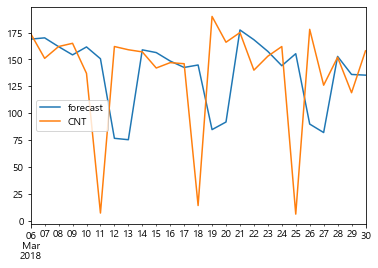

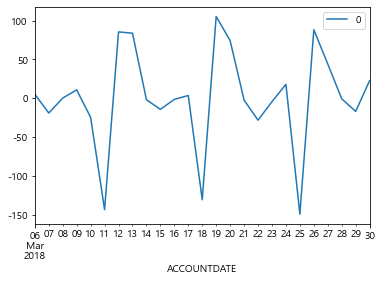

In [11]:
fig=model_fit.plot_predict()
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()

In [25]:
forecast_data=model_fit.forecast(steps=21) 

pred_y=forecast_data[0].tolist()

In [26]:
pred_y

[134.8748908955077,
 145.82258308832894,
 138.08289098547797,
 140.5923805911374,
 137.48065943599542,
 137.4519171289221,
 135.7323009190379,
 134.94005226375043,
 133.63918461571072,
 132.617271389255,
 131.4423643296351,
 130.35136744019053,
 129.21434963269172,
 128.1025722089763,
 126.97695158089931,
 125.85892332180691,
 124.73673099308925,
 123.61682246747432,
 122.49566137956303,
 121.37518726519353,
 120.25433637703122]

In [30]:
forecast_data=model_fit.forecast(steps=20) 

pred_y=forecast_data[0].tolist()
test_y=test.CNT.values 

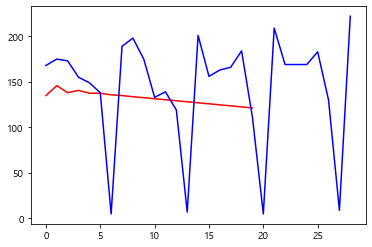

In [31]:
plt.plot(pred_y,color='red') #에측값
plt.plot(test_y,color='blue') #실제값

In [30]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

63.040103015292075


# --------------------------------------------------------------------------------------------------------------

In [23]:
from fbprophet import Prophet

In [24]:
train.columns=['ds','y']
#test.columns=['ds','y']

In [9]:
train=train[(train['ds']>='2018-01-02')&(train['ds']<='2018-03-30')]
test=test[(test['ds']>='2018-04-02')&(test['ds']<='2018-04-30')]

In [25]:
prophet = Prophet(seasonality_mode = 'multiplicative',
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)
prophet.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [31]:
future_data = prophet.make_future_dataframe(periods = 7, freq = 'd')
forecast_data = prophet.predict(future_data)
a=forecast_data[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

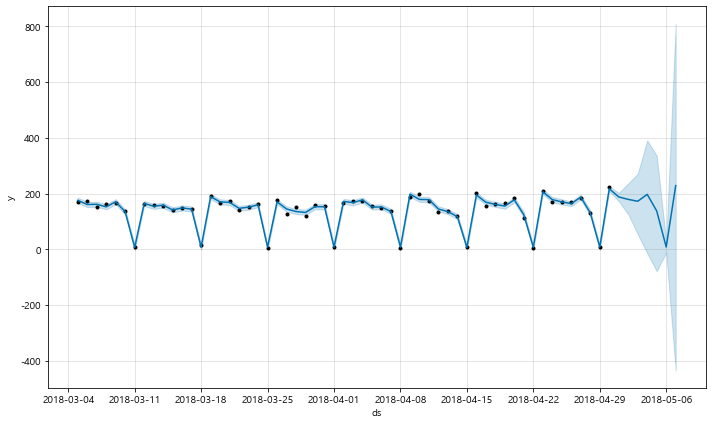

In [32]:
fig1=prophet.plot(forecast_data)

In [28]:
a

,ds,yhat,yhat_lower,yhat_upper
57,2018-05-01,188.010599,170.908474,201.968040
58,2018-05-02,179.207464,117.964330,232.156158
59,2018-05-03,172.494401,51.194146,289.172954
60,2018-05-04,197.218562,-28.504392,413.110786
61,2018-05-05,137.694294,-92.224847,349.110576
62,2018-05-06,8.444922,-13.166226,28.057638
63,2018-05-07,228.530561,-420.179480,852.107145
64,2018-05-08,197.558868,-494.964217,846.631272
65,2018-05-09,188.243105,-612.273211,914.116310
66,2018-05-10,181.129372,-720.646265,1025.683578


In [13]:
pred_y=a.yhat.values[0:21]
test_y=test.y.values[0:21]

In [28]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 61 to 81
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ds          21 non-null     datetime64[ns]
 1   yhat        21 non-null     float64       
 2   yhat_lower  21 non-null     float64       
 3   yhat_upper  21 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 804.0 bytes


In [27]:
a

,ds,yhat,yhat_lower,yhat_upper
61,2018-03-31,124.611530,112.480630,137.365156
62,2018-04-01,124.065130,110.599004,138.918567
63,2018-04-02,162.763771,144.439859,181.102065
64,2018-04-03,146.404670,124.516034,168.377269
65,2018-04-04,142.472545,111.411942,173.351071
66,2018-04-05,129.087987,94.230309,166.353877
67,2018-04-06,150.078806,98.435174,201.370775
68,2018-04-07,120.786724,68.281098,173.807756
69,2018-04-08,120.240323,56.351123,184.536552
70,2018-04-09,157.723726,57.972130,257.936320


In [15]:
pred_ds=a.ds[0:21]

In [19]:
pred_ds

61   2018-03-31
62   2018-04-01
63   2018-04-02
64   2018-04-03
65   2018-04-04
66   2018-04-05
67   2018-04-06
68   2018-04-07
69   2018-04-08
70   2018-04-09
71   2018-04-10
72   2018-04-11
73   2018-04-12
74   2018-04-13
75   2018-04-14
76   2018-04-15
77   2018-04-16
78   2018-04-17
79   2018-04-18
80   2018-04-19
81   2018-04-20
Name: ds, dtype: datetime64[ns]

In [14]:
pred_y #2020년도의 에측값

array([124.61153043, 124.06512954, 162.76377113, 146.40467036,
       142.47254497, 129.08798719, 150.0788063 , 120.78672406,
       120.24032316, 157.72372646, 141.8510482 , 138.02144615,
       125.03696588, 145.34784453, 116.96191768, 116.41551679,
       152.68368179, 137.29742604, 133.57034733, 120.98594458,
       140.61688277])

In [21]:
test_y #2020년도의 실제값


array([168, 175, 173, 155, 149, 190, 198, 175, 133, 139, 201, 156, 163,
       166, 184, 209, 169, 169, 169, 183, 223], dtype=int64)

In [22]:
test

,ds,y
61,2018-04-02,168
62,2018-04-03,175
63,2018-04-04,173
64,2018-04-05,155
65,2018-04-06,149
66,2018-04-09,190
67,2018-04-10,198
68,2018-04-11,175
69,2018-04-12,133
70,2018-04-13,139


In [ ]:
plt.plot(pred_y,color='red') #에측값
plt.plot(test_y,color='blue') #실제값

In [29]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
rmse=sqrt(mean_squared_error(pred_y,test_y))
print(rmse)

46.83921176781041
